Ravi Dholakia

October 15, 2019

Derivatives and Interpolation

$\frac{df}{dx}=\frac{f(x+h/2)-f(x-h/2)}{h}$

This is the main formula of the central difference method. The central difference approximates the derivative of a function f(x) using the difference between two values of f(x) at points h-distance apart.


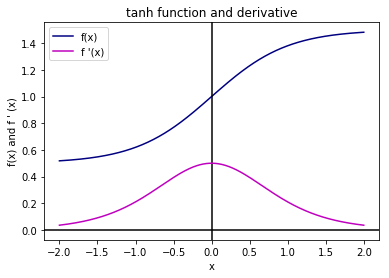

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

N=1000
x=np.linspace(-2,2,N)

def f(x):
    return 1+((1/2)*math.tanh(x))

y=np.zeros(N)

for i in range(len(x)):
    y[i]=f(x[i])
    
plt.plot(x,y,"navy",label="f(x)")
plt.axhline(color="k")
plt.axvline(color="k")
#plt.show()

h=10**-10

derivative_f=np.zeros(N)
for i in range(N):
    derivative_f[i]=(f(x[i]+h)-f(x[i]-h))/(2*h)
    
plt.plot(x,derivative_f,"m-",label="f '(x)")
plt.legend()
plt.title("tanh function and derivative")
plt.xlabel("x")
plt.ylabel("f(x) and f ' (x)")
plt.show()


Tanh function

This method of using the central difference is a simple method for numerically calculating derivatives as opposed to figuring out the antiderivative for tanh.


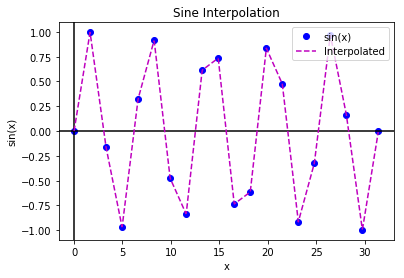

RMS Residual Error is:  0.17115340261523368


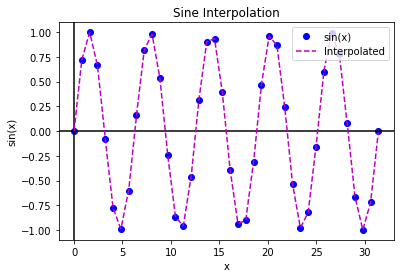

RMS Residual Error is:  0.04349789625777681


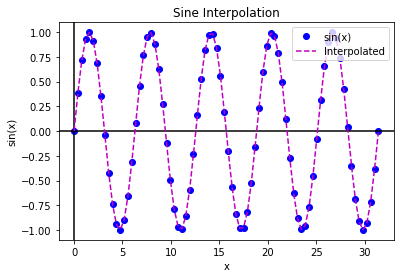

RMS Residual Error is:  0.009469968476470794


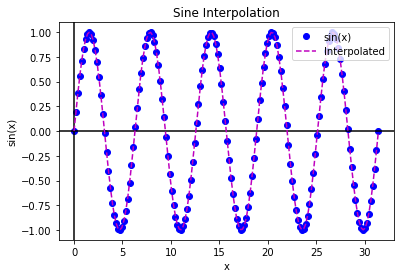

RMS Residual Error is:  0.0025253259698495355


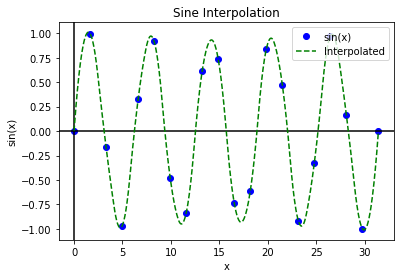

RMS Residual Error is:  0.0722601836233304


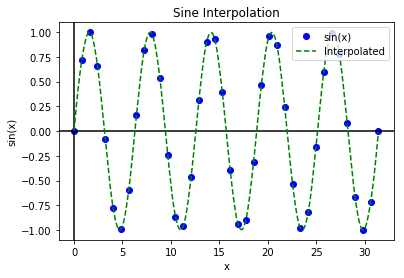

RMS Residual Error is:  0.009983960392305606


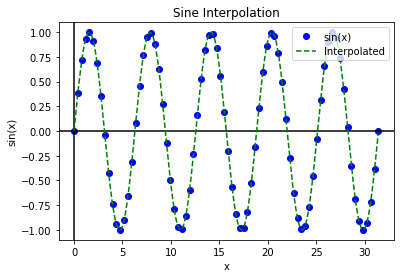

RMS Residual Error is:  0.0006988349039106905


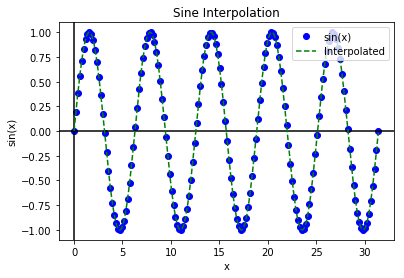

RMS Residual Error is:  5.086599320134884e-05


In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate as irplt

def Plot_SIN_WITH_N(N,kind_string,color_string):
    Sin_Function_x=np.linspace(0,10*math.pi,N)
    Sin_Function_y=np.zeros(N)
    
    for i in range(N):
        Sin_Function_y[i]=math.sin(Sin_Function_x[i])
    plt.plot(Sin_Function_x,Sin_Function_y,'bo',label="sin(x)")
    plt.axhline(color='k')
    plt.axvline(color='k')
    plt.title("Sine Interpolation")
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    
    Interp_func=irplt.interp1d(Sin_Function_x, Sin_Function_y, kind=kind_string)
    ix=np.arange(0,10*math.pi,0.05)
    iy=Interp_func(ix)
    
    plt.plot(ix,iy,color_string,label="Interpolated")
    plt.legend(loc=1)
    plt.show()
    
    SumParts=np.zeros(N)
    HalfValues=np.zeros(N)
    
    for i in range(1,N):
        SumParts[i]=(iy[i]-math.sin(ix[i]))**2
    
    RMS_Residual=math.sqrt(sum(SumParts)/N)
    print("RMS Residual Error is: ",RMS_Residual)

    
Plot_SIN_WITH_N(20,"linear","m--")
Plot_SIN_WITH_N(40,"linear","m--")
Plot_SIN_WITH_N(80,"linear","m--")
Plot_SIN_WITH_N(160,"linear","m--")

Plot_SIN_WITH_N(20,"quadratic","g--")
Plot_SIN_WITH_N(40,"quadratic","g--")
Plot_SIN_WITH_N(80,"quadratic","g--")
Plot_SIN_WITH_N(160,"quadratic","g--")


Part a and b

Plotting sin(x) and Linearly Interpolating

First I plotted sin(x) with N points spread out equally along [0,10$\pi$]. Then I fit the interp1d plot and compared to the sin plot at each N (20, 40, 80, 160). The higher the N the better the fit. For the quadratic/cubic interpolations, the fit was very good for the low numbers, and then got better as the number of points increased.



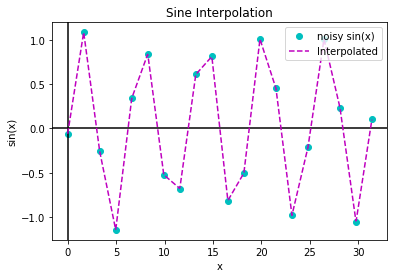

RMS Residual Error is:  0.1766572642769955


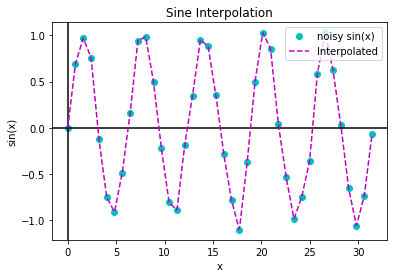

RMS Residual Error is:  0.06048236988629891


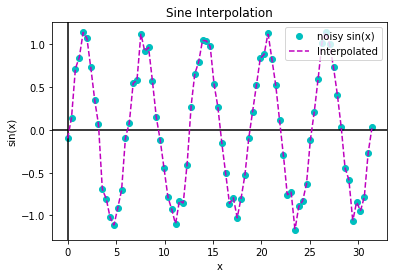

RMS Residual Error is:  0.11834477052511617


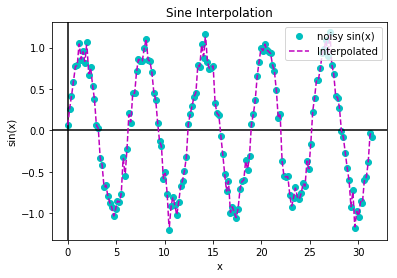

RMS Residual Error is:  0.07280033126288725


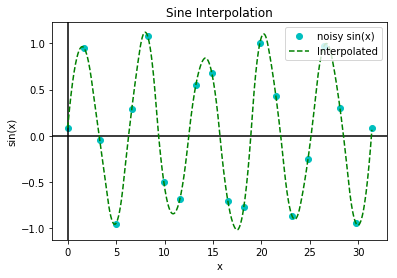

RMS Residual Error is:  0.08403083310440723


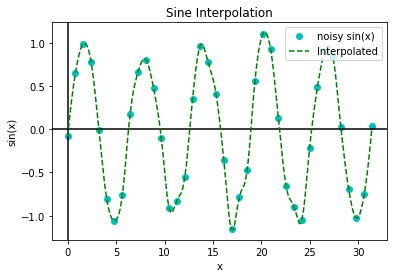

RMS Residual Error is:  0.054050772382597534


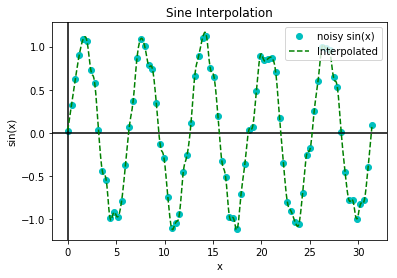

RMS Residual Error is:  0.10577418350778837


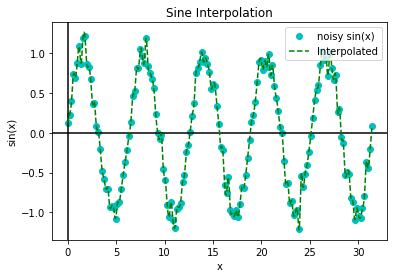

RMS Residual Error is:  0.08223402733426738


In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate as irplt

def Plot_SIN_WITH_Noise(N,kind_string,color_string):
    Sin_Function_x=np.linspace(0,10*math.pi,N)
    Sin_Function_y=np.zeros(N)
    
    for i in range(N):
        noise = np.random.normal(0,0.1)
        Sin_Function_y[i]=math.sin(Sin_Function_x[i])
        Sin_Function_y[i]+=noise
    plt.plot(Sin_Function_x,Sin_Function_y,'co',label="noisy sin(x)")
    plt.axhline(color='k')
    plt.axvline(color='k')
    plt.title("Sine Interpolation")
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    
    Interp_func=irplt.interp1d(Sin_Function_x,Sin_Function_y, kind = kind_string)
    ix=np.arange(0,10*math.pi,0.05)
    iy=Interp_func(ix)
    
    plt.plot(ix,iy,color_string,label="Interpolated")
    plt.legend(loc=1)
    plt.show()
    
    SumParts=np.zeros(N)
    
    for i in range(1,N):
        SumParts[i]=(iy[i]-math.sin(ix[i]))**2
    
    RMS_Residual=math.sqrt(sum(SumParts)/N)
    print("RMS Residual Error is: ",RMS_Residual)

Plot_SIN_WITH_Noise(20,"linear","m--")
Plot_SIN_WITH_Noise(40,"linear","m--")
Plot_SIN_WITH_Noise(80,"linear","m--")
Plot_SIN_WITH_Noise(160,"linear","m--")

Plot_SIN_WITH_Noise(20,"quadratic","g--")
Plot_SIN_WITH_Noise(40,"quadratic","g--")
Plot_SIN_WITH_Noise(80,"quadratic","g--")
Plot_SIN_WITH_Noise(160,"quadratic","g--")



Part c

Plotting sin(x) and Interpolating

I used the same code from parts a and b, but I added lines which added noise to the points. This made the graph "noisy, and thus more resembling actual data collected from an experiment. However, as the number of points increased, the RMS residual error decreased at firstm but then increased. This phenomenon was pbserved in several trials of running this code.
